In [1]:
"""
@author:  <Mohammed Awal Kassim>
@contact: <mkass005@uottawa.ca>
@version: 1.0
@summary: < Online learning from evolving data streams using scikit-multiflow>
"""

# Importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

# Magic commands
%matplotlib inline

In [2]:
!pip install scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 12.7 MB/s 


In [3]:
from scipy.io import arff
from skmultiflow.data import FileStream, DataStream
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.trees import HoeffdingTreeClassifier, HoeffdingAdaptiveTreeClassifier
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier, OzaBaggingClassifier

In [4]:
abrupt_data = arff.loadarff('drive/MyDrive/Colab Notebooks/Msc/data/assignment4/INSECTS-abrupt_balanced_norm.arff')
gradual_data = arff.loadarff('drive/MyDrive/Colab Notebooks/Msc/data/assignment4/INSECTS-gradual_balanced_norm.arff')
incremental_data = arff.loadarff('drive/MyDrive/Colab Notebooks/Msc/data/assignment4/INSECTS-incremental_balanced_norm.arff')

abrupt_data = pd.DataFrame(abrupt_data[0])
gradual_data = pd.DataFrame(gradual_data[0])
incremental_data = pd.DataFrame(incremental_data[0])

In [5]:
abrupt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52848 entries, 0 to 52847
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Att1    52848 non-null  float64
 1   Att2    52848 non-null  float64
 2   Att3    52848 non-null  float64
 3   Att4    52848 non-null  float64
 4   Att5    52848 non-null  float64
 5   Att6    52848 non-null  float64
 6   Att7    52848 non-null  float64
 7   Att8    52848 non-null  float64
 8   Att9    52848 non-null  float64
 9   Att10   52848 non-null  float64
 10  Att11   52848 non-null  float64
 11  Att12   52848 non-null  float64
 12  Att13   52848 non-null  float64
 13  Att14   52848 non-null  float64
 14  Att15   52848 non-null  float64
 15  Att16   52848 non-null  float64
 16  Att17   52848 non-null  float64
 17  Att18   52848 non-null  float64
 18  Att19   52848 non-null  float64
 19  Att20   52848 non-null  float64
 20  Att21   52848 non-null  float64
 21  Att22   52848 non-null  float64
 22

In [26]:
classes = abrupt_data['class'].unique()
classes

array([b'ae-albopictus-female', b'cx-quinq-female', b'ae-aegypti-male',
       b'cx-quinq-male', b'ae-aegypti-female', b'ae-albopictus-male'],
      dtype=object)

In [7]:
abrupt_data.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,class
0,0.507066,0.153333,0.226092,0.302447,0.007239,0.369120,0.332436,0.017807,0.032819,0.033009,...,0.006855,0.017358,0.013430,0.009138,0.006768,0.007291,0.009224,0.036218,0.162955,b'ae-albopictus-female'
1,0.281661,0.355953,0.253196,0.340335,0.415631,0.503923,0.392029,0.003648,0.068381,0.011155,...,0.005631,0.014048,0.002431,0.007076,0.037682,0.003089,0.004207,0.004144,0.005044,b'ae-albopictus-female'
2,0.193750,0.257782,0.183339,0.247017,0.302133,0.363522,0.269729,0.293543,0.293002,0.029522,...,0.023837,0.013922,0.081406,0.413674,0.295615,0.120392,0.036566,0.032652,0.025776,b'cx-quinq-female'
3,0.514782,0.154867,0.016903,0.226084,0.297642,0.239111,0.248268,0.066745,0.115020,0.083407,...,0.020949,0.023019,0.021147,0.020813,0.019048,0.011606,0.013379,0.044839,0.123552,b'ae-albopictus-female'
4,0.774337,0.012549,0.105751,0.033302,0.017170,0.049754,0.173500,0.055220,0.044184,0.034923,...,0.034876,0.060708,0.048119,0.027417,0.015022,0.010218,0.008121,0.012539,0.018058,b'ae-aegypti-male'


In [8]:
abrupt_data.describe()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33
count,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,...,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000,52848.000000
mean,0.399400,0.272499,0.193406,0.233276,0.261548,0.335460,0.373387,0.050250,0.066386,0.051646,...,0.035716,0.038926,0.034637,0.040657,0.051841,0.033292,0.030612,0.029384,0.035698,0.039564
std,0.192387,0.141096,0.121332,0.141073,0.176644,0.197394,0.123011,0.060460,0.067034,0.050378,...,0.055410,0.058048,0.048689,0.055851,0.071535,0.048119,0.045776,0.046806,0.056654,0.062663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251482,0.162852,0.094573,0.155965,0.038289,0.222682,0.280468,0.012548,0.019890,0.017212,...,0.007049,0.007994,0.007238,0.008006,0.009691,0.006464,0.006922,0.006781,0.008933,0.009448
50%,0.376938,0.251664,0.215608,0.254462,0.297629,0.368580,0.354930,0.028939,0.046114,0.037462,...,0.014852,0.016934,0.015727,0.017624,0.020913,0.013042,0.012663,0.012143,0.015364,0.016182
75%,0.510836,0.374973,0.277111,0.325662,0.388837,0.471932,0.455229,0.064259,0.089569,0.068552,...,0.036890,0.042204,0.039900,0.049000,0.064149,0.038529,0.031866,0.028343,0.033894,0.036952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preprocess data

  - Encode labels
  - Scale features

In [6]:
def preprocess_data(data):
  # Encode and scale features
  encoder = LabelEncoder()
  scaler = MinMaxScaler()
  data.iloc[:, -1] = encoder.fit_transform(data['class'])
  data.iloc[:, 0:len(data.columns)-1]
  # save to a file and load as stream
  data.to_csv("data.csv")
  data_stream = FileStream("data.csv")
  return data_stream

In [7]:
abrupt_stream = preprocess_data(abrupt_data)
gradual_stream = preprocess_data(gradual_data)
incremental_stream = preprocess_data(incremental_data)
abrupt_stream

FileStream(allow_nan=False, cat_features=None, filepath='data.csv', n_targets=1,
           target_idx=-1)

# Majority class classifier

In [8]:

class MajorityClassifier:
  """
  Implements the majority class classifier
  """
  def __init__(self) -> None:
    self.correct_predictions = 0
    self.wrong_predictions = 0
    self.accuracies = []
    self.instances = []

  def evaluate(self, stream, pretrain_size=1000, window_size=1000):
    x_values, y_values = stream.next_sample(1000)
    actual_y = []
    predicted_y = []

    while stream.has_more_samples and (stream.n_remaining_samples() > 0):
      x, y = stream.next_sample()
      actual_y.append(y[0])
      y_pred = max(set(y_values), key = list(y_values).count)
      predicted_y.append(y_pred)
      if y[0] == y_pred:
        self.correct_predictions += 1
      else:
        self.wrong_predictions += 1
      np.append(y_values, y_pred)
      y_values = y_values[-window_size:]

      # Calculate accuracies and create dataframe
      accuracy = accuracy_score(predicted_y, actual_y)
      self.accuracies.append(accuracy)
      self.instances.append(int(x[0][0]))

    return self.instances, self.accuracies
    # Partial fit
    # Increase number of samples

  def __repr__(self) -> str:
    return f"MajorityClassifier(correct predictions = {self.correct_predictions}, wrong predictions = {self.wrong_predictions})"


## Majority class classifier for abrupt data

In [66]:
abrupt_majority = MajorityClassifier()
abrupt_x, abrupt_y = abrupt_majority.evaluate(abrupt_stream)
abrupt_df = pd.DataFrame(zip(abrupt_x, abrupt_y), columns=['instances', 'accuracy'])
abrupt_df.to_csv("abrupt_majority.csv")

## Majority class classifier for gradual data

In [70]:
gradual_majority = MajorityClassifier()
gradual_x, gradual_y = gradual_majority.evaluate(gradual_stream)
gradual_df = pd.DataFrame(zip(gradual_x, gradual_y), columns=['instances', 'accuracy'])
gradual_df.to_csv("gradual_majority.csv")

## Majority class classifier for incremental data

In [71]:
incremental_majority = MajorityClassifier()
incremental_majority = MajorityClassifier()
incremental_x, incremental_y = incremental_majority.evaluate(incremental_stream)
incremental_df = pd.DataFrame(zip(incremental_x, incremental_y), columns=['instances', 'accuracy'])
incremental_df.to_csv("incremental_majority.csv")

# No Change Classifier

In [9]:

class NoChangeClassifier:
  """
  Implements the no change class classifier
  """
  def __init__(self) -> None:
    self.correct_predictions = 0
    self.wrong_predictions = 0
    self.samples = 0
    self.accuracies = []
    self.instances = []

  def evaluate(self, stream, pretrain_size=1000, window_size=1000):
    x_values, y_values = stream.next_sample(1000)
    actual_y = []
    predicted_y = []

    while stream.has_more_samples and (stream.n_remaining_samples() > 0):
      x, y = stream.next_sample()
      actual_y.append(y[0])
      y_pred = y_values[-1]
      predicted_y.append(y_pred)
      if y[0] == y_pred:
        self.correct_predictions += 1
      else:
        self.wrong_predictions += 1
      np.append(y_values, y_pred)
      y_values = y_values[-window_size:]

      # Calculate accuracies and create dataframe
      accuracy = accuracy_score(predicted_y, actual_y)
      self.accuracies.append(accuracy)
      self.instances.append(int(x[0][0]))
      self.samples += 1

    return self.instances, self.accuracies
    # Partial fit
    # Increase number of samples

  def __repr__(self) -> str:
    return f"NoChangeClassifier(correct predictions = {self.correct_predictions}, wrong predictions = {self.wrong_predictions})"


## No change classifier for abrupt data

In [16]:
# Re-initialize streams
abrupt_stream = preprocess_data(abrupt_data)
gradual_stream = preprocess_data(gradual_data)
incremental_stream = preprocess_data(incremental_data)

In [79]:
abrupt_change = NoChangeClassifier()
abrupt_change = NoChangeClassifier()
abrupt_x, abrupt_y = abrupt_change.evaluate(abrupt_stream)
abrupt_df = pd.DataFrame(zip(abrupt_x, abrupt_y), columns=['instances', 'accuracy'])
abrupt_df.to_csv("abrupt_change.csv")

## No change classifier for gradual data

In [80]:
gradual_change = NoChangeClassifier()
gradual_change = NoChangeClassifier()
gradual_x, gradual_y = gradual_change.evaluate(gradual_stream)
gradual_df = pd.DataFrame(zip(gradual_x, gradual_y), columns=['instances', 'accuracy'])
gradual_df.to_csv("gradual_change.csv")

## No change classifier for incremental data

In [81]:
incremental_change = NoChangeClassifier()
incremental_change = NoChangeClassifier()
incremental_x, incremental_y = incremental_change.evaluate(incremental_stream)
incremental_df = pd.DataFrame(zip(incremental_x, incremental_y), columns=['instances', 'accuracy'])
incremental_df.to_csv("incremental_change.csv")

# Evaluating 5 different online algorithms on 3 streams

In [ ]:
# Define algorithms
algorithms = {
    'h_trees' : HoeffdingTreeClassifier(),
    'ha_trees': HoeffdingAdaptiveTreeClassifier(),
    'sam_knn' : SAMKNNClassifier(),
    'random_forest' : AdaptiveRandomForestClassifier(),
    'oza_bag' : OzaBaggingClassifier()
}

streams = {
    'abrupt': abrupt_stream,
    'incremental': incremental_stream,
    'gradual': gradual_stream
}
for stream in streams.keys():
  for algorithm in algorithms.keys():
    evaluator = EvaluatePrequential(pretrain_size=1000,
                                output_file=f'{stream}_{algorithm}.csv')
    evaluator.evaluate(stream=streams[stream], model=algorithms[algorithm])

In [ ]:
    evaluator = EvaluatePrequential(pretrain_size=1000,
                                output_file='gradual_random_forest.csv')
    evaluator.evaluate(stream=gradual_stream, model=algorithms['random_forest'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [468.09s]
Processed samples: 24150
Mean performance:
M0 - Accuracy     : 0.7682
M0 - Kappa        : 0.7212


[AdaptiveRandomForestClassifier(binary_split=False, disable_weighted_vote=False,
                                drift_detection_method=ADWIN(delta=0.001),
                                grace_period=50, lambda_value=6,
                                leaf_prediction='nba', max_byte_size=33554432,
                                max_features=6, memory_estimate_period=2000000,
                                n_estimators=10, nb_threshold=0,
                                no_preprune=False, nominal_attributes=None,
                                performance_metric='acc', random_state=None,
                                remove_poor_atts=False, split_confidence=0.01,
                                split_criterion='info_gain',
                                stop_mem_management=False, tie_threshold=0.05,
                                warning_detection_method=ADWIN(delta=0.01))]

In [ ]:
    evaluator = EvaluatePrequential(pretrain_size=1000,
                                output_file='gradual_oza_bag.csv')
    evaluator.evaluate(stream=gradual_stream, model=algorithms['oza_bag'])

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [1120.70s]
Processed samples: 24150
Mean performance:
M0 - Accuracy     : 0.3743
M0 - Kappa        : 0.2483


[OzaBaggingClassifier(base_estimator=KNNADWINClassifier(leaf_size=30,
                                                        max_window_size=1000,
                                                        metric='euclidean',
                                                        n_neighbors=5),
                      n_estimators=10, random_state=None)]

# Plot prequential accuracies

## Abrupt Drift

In [9]:
# Load files with stored data
majority = pd.read_csv('abrupt_majority.csv')
no_change = pd.read_csv('abrupt_change.csv')
h_trees = pd.read_csv('abrupt_h_trees.csv')
ha_trees = pd.read_csv('abrupt_ha_trees.csv')
sam_knn = pd.read_csv('abrupt_sam_knn.csv')
oza_bag = pd.read_csv('abrupt_oza_bag.csv')
random_forest= pd.read_csv('abrupt_random_forest.csv')

In [10]:
abrupt_accuracy = [np.mean(majority['accuracy']), np.mean(no_change['accuracy']), h_trees['mean_acc_[M0]'].iloc[-1],
                                                          ha_trees['mean_acc_[M0]'].iloc[-1], sam_knn['mean_acc_[M0]'].iloc[-1],
                                                          oza_bag['mean_acc_[M0]'].iloc[-1], random_forest['mean_acc_[M0]'].iloc[-1]]
abrupt_accuracy

[0.16344842837292847,
 0.17130463343723956,
 0.560774,
 0.626331,
 0.307572,
 0.304467,
 0.748168]

In [115]:
majority_x, majority_y = majority['instances'], majority['accuracy']
change_x, change_y = no_change['instances'], no_change['accuracy']
h_x, h_y = h_trees['id'], h_trees['current_acc_[M0]']
ha_x, ha_y = ha_trees['id'], ha_trees['current_acc_[M0]']
knn_x, knn_y = sam_knn['id'], sam_knn['current_acc_[M0]']
oza_x, oza_y = oza_bag['id'], oza_bag['current_acc_[M0]']
random_x, random_y = random_forest['id'], random_forest['current_acc_[M0]']

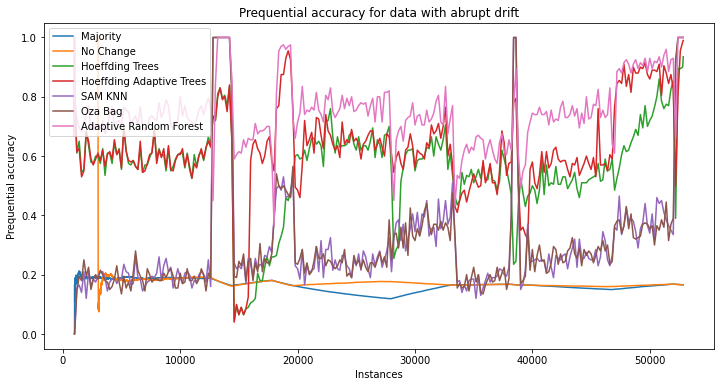

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(majority_x, majority_y,  label='Majority')
plt.plot(change_x, change_y, label='No Change')
plt.plot(h_x, h_y, label='Hoeffding Trees')
plt.plot(ha_x, ha_y, label='Hoeffding Adaptive Trees')
plt.plot(knn_x, knn_y, label='SAM KNN')
plt.plot(oza_x, oza_y, label='Oza Bag')
plt.plot(random_x, random_y, label='Adaptive Random Forest')
plt.title('Prequential accuracy for data with abrupt drift')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 60000, step=10000))
plt.legend()
plt.savefig('abrupt.pdf', bbox_inches='tight')

## Incremental


In [11]:
# Load files with stored data
majority = pd.read_csv('incremental_majority.csv')
no_change = pd.read_csv('incremental_change.csv')
h_trees = pd.read_csv('incremental_h_trees.csv')
ha_trees = pd.read_csv('incremental_ha_trees.csv')
sam_knn = pd.read_csv('incremental_sam_knn.csv')
oza_bag = pd.read_csv('incremental_oza_bag.csv')
random_forest= pd.read_csv('incremental_random_forest.csv')

In [12]:
incremental_accuracy = [np.mean(majority['accuracy']), np.mean(no_change['accuracy']), h_trees['mean_acc_[M0]'].iloc[-1],
                                                          ha_trees['mean_acc_[M0]'].iloc[-1], sam_knn['mean_acc_[M0]'].iloc[-1],
                                                          oza_bag['mean_acc_[M0]'].iloc[-1], random_forest['mean_acc_[M0]'].iloc[-1]]
incremental_accuracy

[0.16663266786103503,
 0.16654781522445133,
 0.528812,
 0.542736,
 0.164644,
 0.157789,
 0.649684]

In [119]:
majority_x, majority_y = majority['instances'], majority['accuracy']
change_x, change_y = no_change['instances'], no_change['accuracy']
h_x, h_y = h_trees['id'], h_trees['current_acc_[M0]']
ha_x, ha_y = ha_trees['id'], ha_trees['current_acc_[M0]']
knn_x, knn_y = sam_knn['id'], sam_knn['current_acc_[M0]']
oza_x, oza_y = oza_bag['id'], oza_bag['current_acc_[M0]']
random_x, random_y = random_forest['id'], random_forest['current_acc_[M0]']

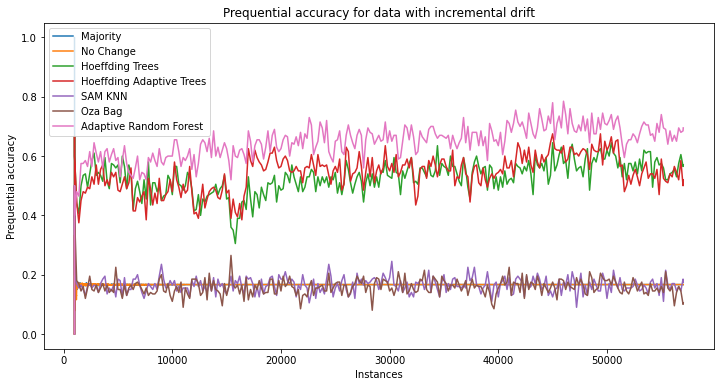

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(majority_x, majority_y,  label='Majority')
plt.plot(change_x, change_y, label='No Change')
plt.plot(h_x, h_y, label='Hoeffding Trees')
plt.plot(ha_x, ha_y, label='Hoeffding Adaptive Trees')
plt.plot(knn_x, knn_y, label='SAM KNN')
plt.plot(oza_x, oza_y, label='Oza Bag')
plt.plot(random_x, random_y, label='Adaptive Random Forest')
plt.title('Prequential accuracy for data with incremental drift')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 60000, step=10000))
plt.legend()
plt.savefig('incremental.pdf', bbox_inches='tight')

## Gradual drift

In [13]:
# Load files with stored data
majority = pd.read_csv('gradual_majority.csv')
no_change = pd.read_csv('gradual_change.csv')
h_trees = pd.read_csv('gradual_h_trees.csv')
ha_trees = pd.read_csv('gradual_ha_trees.csv')
sam_knn = pd.read_csv('gradual_sam_knn.csv')
oza_bag = pd.read_csv('gradual_oza_bag.csv')
random_forest= pd.read_csv('gradual_random_forest.csv')

In [14]:
gradual_accuracy = [np.mean(majority['accuracy']), np.mean(no_change['accuracy']), h_trees['mean_acc_[M0]'].iloc[-1],
                                                          ha_trees['mean_acc_[M0]'].iloc[-1], sam_knn['mean_acc_[M0]'].iloc[-1],
                                                          oza_bag['mean_acc_[M0]'].iloc[-1], random_forest['mean_acc_[M0]'].iloc[-1]]
gradual_accuracy

[0.21909937472858074,
 0.2171117605618143,
 0.526004,
 0.632613,
 0.374514,
 0.374255,
 0.768164]

In [122]:
majority_x, majority_y = majority['instances'], majority['accuracy']
change_x, change_y = no_change['instances'], no_change['accuracy']
h_x, h_y = h_trees['id'], h_trees['current_acc_[M0]']
ha_x, ha_y = ha_trees['id'], ha_trees['current_acc_[M0]']
knn_x, knn_y = sam_knn['id'], sam_knn['current_acc_[M0]']
oza_x, oza_y = oza_bag['id'], oza_bag['current_acc_[M0]']
random_x, random_y = random_forest['id'], random_forest['current_acc_[M0]']

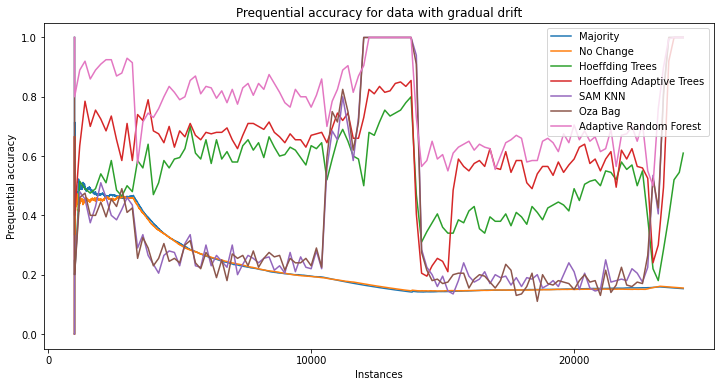

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(majority_x, majority_y,  label='Majority')
plt.plot(change_x, change_y, label='No Change')
plt.plot(h_x, h_y, label='Hoeffding Trees')
plt.plot(ha_x, ha_y, label='Hoeffding Adaptive Trees')
plt.plot(knn_x, knn_y, label='SAM KNN')
plt.plot(oza_x, oza_y, label='Oza Bag')
plt.plot(random_x, random_y, label='Adaptive Random Forest')
plt.title('Prequential accuracy for data with gradual drift')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 30000, step=10000))
plt.legend()
plt.savefig('gradual.pdf', bbox_inches='tight')

# Hoeffding Trees and ADWIN drift detector

In [26]:
from skmultiflow.drift_detection.adwin import ADWIN

adwin = ADWIN()
hoeffding_tree = HoeffdingTreeClassifier()

# Reinitialize streams
abrupt_stream = preprocess_data(abrupt_data)
gradual_stream = preprocess_data(gradual_data)
incremental_stream = preprocess_data(incremental_data)

def detect_drift(stream, pretrain_size=1000, window_size=1000):
  correct_count = 0
  samples = 0
  accuracy = []
  drift_x = []
  drift_y = []

  x_values, y_values = stream.next_sample(1000)
  hoeffding_tree.fit(x_values, y_values)

  while stream.has_more_samples and (stream.n_remaining_samples() > 0):
    x, y = stream.next_sample()
    #actual_y.append(y[0])
    y_pred = hoeffding_tree.predict(x)
    #predicted_y.append(y_pred)
    if y_pred == y[0]:
      correct_count += 1
    adwin.add_element(y_pred[0])
    if adwin.detected_change():
      print('change detected')
      drift_x.append(x[0][0])
      drift_y.append(correct_count / samples)
      hoeffding_tree.reset()
      adwin.reset()
    hoeffding_tree.partial_fit(x[-1000:], y)
    samples += 1
    accuracy.append(correct_count / samples)

  return accuracy, (drift_x, drift_y)

    
    # np.append(y_values, y_pred)
    # y_values = y_values[-window_size:]


In [27]:
accuracy, (drift_x, drift_y) = detect_drift(abrupt_stream)

change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected


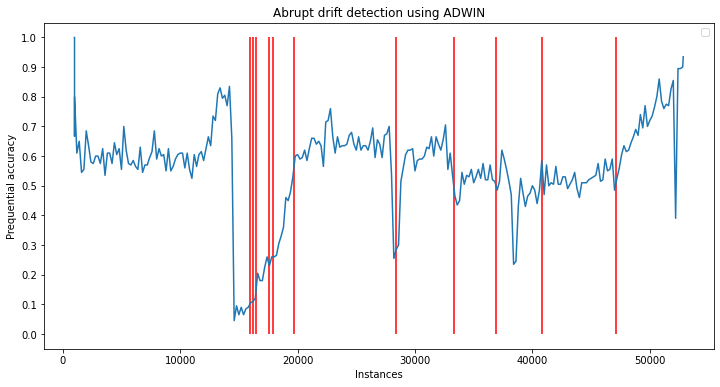

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(h_trees['id'], h_trees['current_acc_[M0]'])
plt.vlines(drift_x, ymin=0, ymax=1,  colors='r')
plt.title('Abrupt drift detection using ADWIN')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 60000, step=10000))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.savefig('abrupt_detection_unadapted.pdf', bbox_inches='tight')

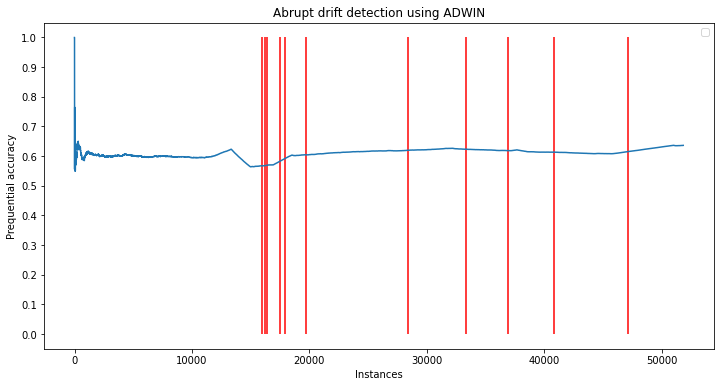

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(accuracy)
plt.vlines(drift_x, ymin=0, ymax=1,  colors='r')
plt.title('Abrupt drift detection using ADWIN')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 60000, step=10000))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.savefig('abrupt_detection.pdf', bbox_inches='tight')

Incremental stream

In [32]:
accuracy, (drift_x, drift_y) = detect_drift(incremental_stream)

change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected


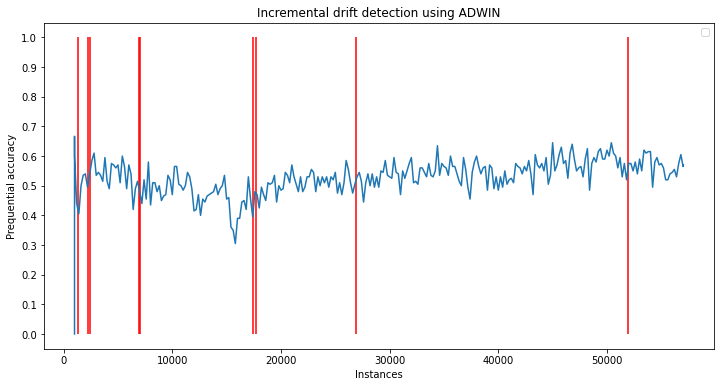

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(h_trees['id'], h_trees['current_acc_[M0]'])
plt.vlines(drift_x, ymin=0, ymax=1,  colors='r')
plt.title('Incremental drift detection using ADWIN')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 60000, step=10000))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.savefig('incremental_detection_undadapted.pdf', bbox_inches='tight')

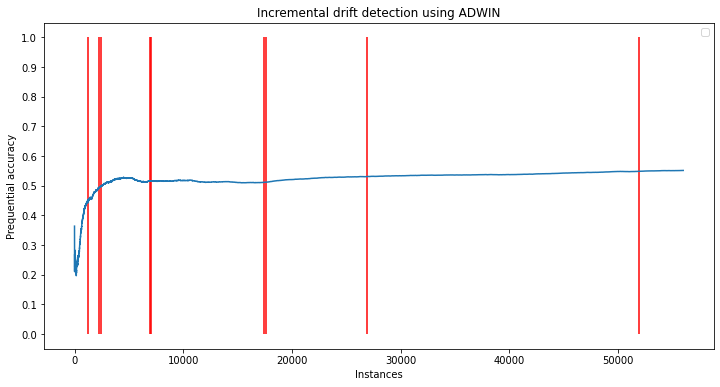

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(accuracy[10:])
plt.vlines(drift_x, ymin=0, ymax=1,  colors='r')
plt.title('Incremental drift detection using ADWIN')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 60000, step=10000))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.savefig('incremental_detection.pdf', bbox_inches='tight')

In [35]:
accuracy, (drift_x, drift_y) = detect_drift(gradual_stream)

change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected
change detected


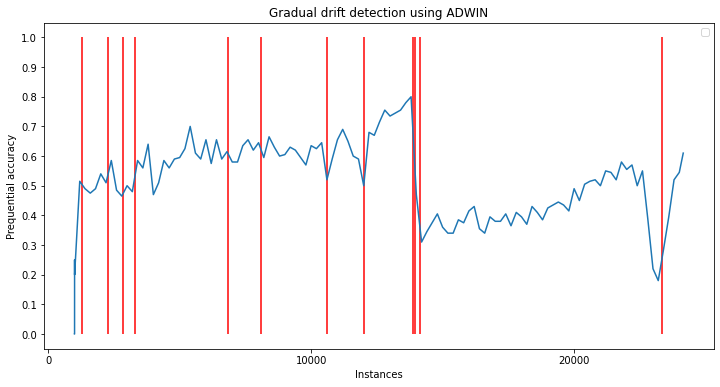

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(h_trees['id'], h_trees['current_acc_[M0]'])
plt.vlines(drift_x, ymin=0, ymax=1,  colors='r')
plt.title('Gradual drift detection using ADWIN')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 30000, step=10000))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.savefig('gradual_detection_unadapted.pdf', bbox_inches='tight')

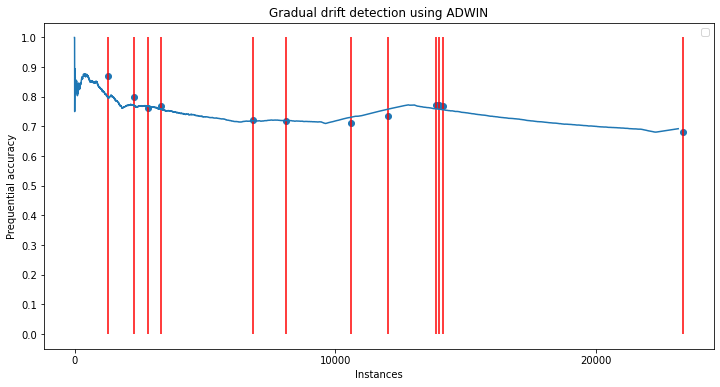

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(accuracy[2:])
plt.vlines(drift_x, ymin=0, ymax=1,  colors='r')
plt.title('Gradual drift detection using ADWIN')
plt.xlabel('Instances')
plt.ylabel('Prequential accuracy')
plt.xticks(np.arange(0, 30000, step=10000))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.savefig('gradual_detection.pdf', bbox_inches='tight')

In [15]:
abrupt_accuracy = [round(accuracy, 2) for accuracy in np.array(abrupt_accuracy) * 100]
incremental_accuracy = [round(accuracy, 2) for accuracy in np.array(incremental_accuracy) * 100]
gradual_accuracy = [round(accuracy, 2) for accuracy in np.array(gradual_accuracy) * 100]

In [17]:
abrupt_accuracy

[16.34, 17.13, 56.08, 62.63, 30.76, 30.45, 74.82]

In [16]:
accuracies = pd.DataFrame(zip(abrupt_accuracy, incremental_accuracy, gradual_accuracy))
accuracies

,0,1,2
0,16.34,16.66,21.91
1,17.13,16.65,21.71
2,56.08,52.88,52.60
3,62.63,54.27,63.26
4,30.76,16.46,37.45
5,30.45,15.78,37.43
6,74.82,64.97,76.82
